In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## 加载数据

### 加载商铺数据
```
- shop_id 商铺id
- city_name 城市名称
- location_id 区域ID
- per_pay 人均消费(越大越高)
- score 商铺评分
- comment_cnt 评论数量
- shop_level 门店等级（数值越大门店等级越高）
- cate_1_name 分类1
- cate_2_name 分类2
- cate_3_name 分类3
```

In [2]:
df_shop = pd.read_csv('../data/shop_info.txt', header=None)
df_shop.columns = ['shop_id', 'city_name', 'location_id', 'per_pay',
                             'score', 'comment_cnt', 'shop_level', 'cate_1_name', 'cate_2_name', 'cate_3_name']
df_shop.head()

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
0,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
1,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,NaN
2,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
3,4,天津,380,18,NaN,NaN,1,超市便利店,超市,NaN
4,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果


In [3]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   shop_id      2000 non-null   int64  
 1   city_name    2000 non-null   object 
 2   location_id  2000 non-null   int64  
 3   per_pay      2000 non-null   int64  
 4   score        1709 non-null   float64
 5   comment_cnt  1709 non-null   float64
 6   shop_level   2000 non-null   int64  
 7   cate_1_name  2000 non-null   object 
 8   cate_2_name  2000 non-null   object 
 9   cate_3_name  1415 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 156.4+ KB


In [4]:
df_shop.describe()

,shop_id,location_id,per_pay,score,comment_cnt,shop_level
count,2000.000000,2000.000000,2000.000000,1709.000000,1709.000000,2000.000000
mean,1000.500000,583.083000,10.479000,2.677004,3.130486,0.814500
std,577.494589,335.763357,5.762479,1.024211,3.499072,0.855836
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,500.750000,287.750000,5.000000,2.000000,1.000000,0.000000
50%,1000.500000,577.500000,10.000000,3.000000,2.000000,1.000000
75%,1500.250000,877.250000,15.000000,3.000000,4.000000,2.000000
max,2000.000000,1159.000000,20.000000,4.000000,20.000000,2.000000


In [5]:
# 商铺分别分布在122个城市
tmp = df_shop['city_name'].value_counts().reset_index()
print(list(tmp['index']))

['上海', '杭州', '北京', '广州', '南京', '武汉', '深圳', '温州', '苏州', '宁波', '福州', '成都', '绍兴', '厦门', '无锡', '济南', '金华', '青岛', '合肥', '常州', '南昌', '佛山', '重庆', '天津', '西安', '长沙', '南宁', '大连', '郑州', '沈阳', '东莞', '嘉兴', '南通', '珠海', '泉州', '惠州', '石家庄', '台州', '湖州', '哈尔滨', '淮安', '扬州', '江门', '漳州', '徐州', '孝感', '镇江', '宜昌', '襄阳', '贵阳', '昆明', '黄石', '蚌埠', '太原', '南平', '泰州', '中山', '潍坊', '舟山', '株洲', '衢州', '莆田', '黄冈', '黄山', '湛江', '咸宁', '济宁', '烟台', '芜湖', '宁德', '阜阳', '盐城', '十堰', '汉中', '淮北', '廊坊', '日照', '东营', '宝鸡', '肇庆', '锦州', '荆门', '葫芦岛', '石河子', '威海', '宿迁', '铜陵', '通辽', '三明', '保定', '自贡', '德阳', '安康', '龙岩', '邢台', '汕尾', '思茅', '乐山', '梧州', '辽阳', '营口', '上饶', '三亚', '濮阳', '抚顺', '绵阳', '聊城', '洛阳', '柳州', '长治', '六安', '达州', '张家口', '荆州', '信阳', '邯郸', '丽水', '咸阳', '玉林', '天门', '阳江', '清远']


消费级别最小:1,消费级别最大20


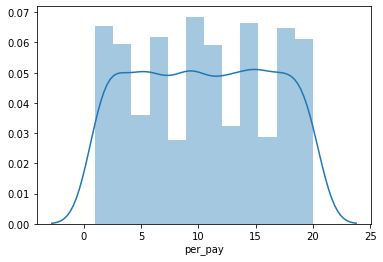

In [6]:
min_perpay = df_shop['per_pay'].min()
max_perpay = df_shop['per_pay'].max()
print(f'消费级别最小:{min_perpay},消费级别最大{max_perpay}')
sns.distplot(df_shop['per_pay'])

评分最小:0.0,评分最大4.0


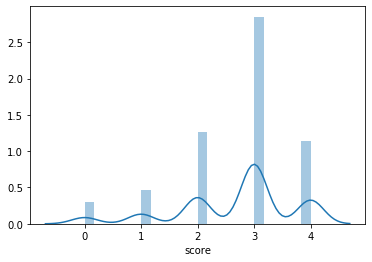

In [7]:
min_perpay = df_shop['score'].min()
max_perpay = df_shop['score'].max()
print(f'评分最小:{min_perpay},评分最大{max_perpay}')
sns.distplot(df_shop['score'])

评论数量最小:0.0,评论数量最大20.0


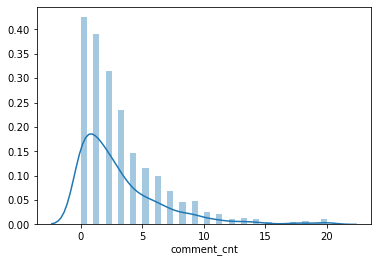

In [8]:
min_perpay = df_shop['comment_cnt'].min()
max_perpay = df_shop['comment_cnt'].max()
print(f'评论数量最小:{min_perpay},评论数量最大{max_perpay}')
sns.distplot(df_shop['comment_cnt'])

商铺级别最小:0,商铺级别最大2


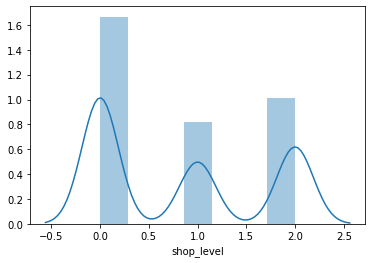

In [9]:
min_shop_level = df_shop['shop_level'].min()
max_shop_level = df_shop['shop_level'].max()
print(f'商铺级别最小:{min_shop_level},商铺级别最大{max_shop_level}')
sns.distplot(df_shop['shop_level'])

In [10]:
### 大部分是美食和超市便利店
df_shop['cate_1_name'].value_counts()

美食          1415
超市便利店        579
医疗健康           2
休闲娱乐           2
购物             1
美发/美容/美甲       1
Name: cate_1_name, dtype: int64

In [11]:
tmp = df_shop.groupby(['cate_1_name', 'cate_2_name',
                       'cate_3_name']).size().reset_index()
tmp = tmp.sort_values(0, ascending=False)
tmp

,cate_1_name,cate_2_name,cate_3_name,0
32,美食,快餐,西式快餐,405
30,美食,快餐,中式快餐,220
19,美食,休闲食品,生鲜水果,111
16,美食,休闲茶饮,奶茶,92
26,美食,小吃,其它小吃,87
40,美食,烘焙糕点,面包,71
17,美食,休闲茶饮,饮品/甜点,67
29,美食,小吃,面点,50
39,美食,烘焙糕点,蛋糕,39
21,美食,休闲食品,零食,22


### 加载浏览数据

In [12]:
df_browser = pd.read_csv('../data/user_view.txt', header=None)
df_browser.columns = ['user_id', 'shop_id', 'timestamp']
df_browser.head()

,user_id,shop_id,timestamp
0,13201967,1197,2016-10-21 18:00:00
1,19461365,1197,2016-06-28 23:00:00
2,15022321,1197,2016-07-16 19:00:00
3,5440872,1197,2016-07-15 07:00:00
4,12594529,1197,2016-08-07 16:00:00


In [13]:
# 浏览数据有5556715
df_browser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556715 entries, 0 to 5556714
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    int64 
 1   shop_id    int64 
 2   timestamp  object
dtypes: int64(2), object(1)
memory usage: 127.2+ MB


In [14]:
user_count = len(df_browser['user_id'].unique())
shop_count = len(df_browser['shop_id'].unique())
min_ts = df_browser['timestamp'].min()
max_ts = df_browser['timestamp'].max()
print(f'用户数量：{user_count},商铺数量:{shop_count},最早统计时间{min_ts},最晚统计时间{max_ts}')

用户数量：3683210,商铺数量:1997,最早统计时间2016-06-22 00:00:00,最晚统计时间2016-10-31 23:00:00


In [15]:
def get_date_dim(df, ts_col='timestamp'):
    df[ts_col] = pd.to_datetime(df[ts_col])
    df['month'] = df[ts_col].dt.month
    df['date'] = df[ts_col].dt.date
    df['hour'] = df[ts_col].dt.hour
    df['day_of_week'] = df[ts_col].dt.dayofweek
    df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)
    return df

In [16]:
df_browser = get_date_dim(df_browser)
df_browser.head()

,user_id,shop_id,timestamp,month,date,hour,day_of_week,weekend
0,13201967,1197,2016-10-21 18:00:00,10,2016-10-21,18,4,0
1,19461365,1197,2016-06-28 23:00:00,6,2016-06-28,23,1,0
2,15022321,1197,2016-07-16 19:00:00,7,2016-07-16,19,5,1
3,5440872,1197,2016-07-15 07:00:00,7,2016-07-15,7,4,0
4,12594529,1197,2016-08-07 16:00:00,8,2016-08-07,16,6,1


In [17]:
tmp = df_browser.groupby(['day_of_week', 'hour']).size().reset_index()
tmp.head()

,day_of_week,hour,0
0,0,0,13956
1,0,1,7436
2,0,2,4150
3,0,3,2648
4,0,4,2221


In [18]:
tmp['day_of_week'] = tmp['day_of_week'].astype(str)
tmp['hour'] = tmp['hour'].astype(str)
tmp['week_hour'] = tmp['day_of_week'].str.cat(tmp['hour'], sep='-')
tmp.head()

,day_of_week,hour,0,week_hour
0,0,0,13956,0-0
1,0,1,7436,0-1
2,0,2,4150,0-2
3,0,3,2648,0-3
4,0,4,2221,0-4


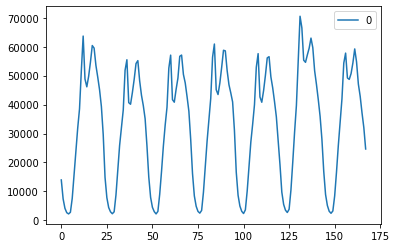

In [19]:
# 可以看出 每天中午12点左右是浏览的高峰，周六上午的浏览量最高
tmp.plot(y=0)

### 加载交易数据

In [20]:
df_pay = pd.read_csv('../data/user_pay.txt', header=None)
df_pay.columns = ['user_id', 'shop_id', 'timestamp']
df_pay.head()

,user_id,shop_id,timestamp
0,22127870,1862,2015-12-25 17:00:00
1,3434231,1862,2016-10-05 11:00:00
2,16955285,1862,2016-02-10 15:00:00
3,13799128,1862,2016-01-13 14:00:00
4,13799128,1862,2016-07-05 12:00:00


In [21]:
# 交易数据有69674110
df_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69674110 entries, 0 to 69674109
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user_id    int64 
 1   shop_id    int64 
 2   timestamp  object
dtypes: int64(2), object(1)
memory usage: 1.6+ GB


In [22]:
user_count = len(df_pay['user_id'].unique())
shop_count = len(df_pay['shop_id'].unique())
min_ts = df_pay['timestamp'].min()
max_ts = df_pay['timestamp'].max()
print(f'用户数量：{user_count},商铺数量:{shop_count},最早统计时间{min_ts},最晚统计时间{max_ts}')

用户数量：19583949,商铺数量:2000,最早统计时间2015-06-26 06:00:00,最晚统计时间2016-10-31 23:00:00


In [23]:
df_pay = get_date_dim(df_pay)
df_pay.head()

,user_id,shop_id,timestamp,month,date,hour,day_of_week,weekend
0,22127870,1862,2015-12-25 17:00:00,12,2015-12-25,17,4,0
1,3434231,1862,2016-10-05 11:00:00,10,2016-10-05,11,2,0
2,16955285,1862,2016-02-10 15:00:00,2,2016-02-10,15,2,0
3,13799128,1862,2016-01-13 14:00:00,1,2016-01-13,14,2,0
4,13799128,1862,2016-07-05 12:00:00,7,2016-07-05,12,1,0


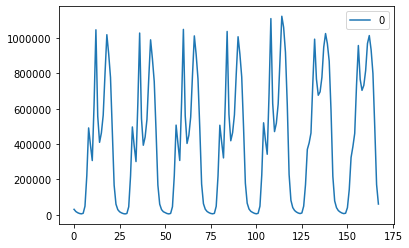

In [24]:
tmp_pay = df_pay.groupby(['day_of_week', 'hour']).size().reset_index()
tmp_pay['day_of_week'] = tmp_pay['day_of_week'].astype(str)
tmp_pay['hour'] = tmp_pay['hour'].astype(str)
tmp_pay['week_hour'] = tmp_pay['day_of_week'].str.cat(tmp_pay['hour'], sep='-')
tmp_pay.plot(y=0)

In [25]:
df_browser.head()

,user_id,shop_id,timestamp,month,date,hour,day_of_week,weekend
0,13201967,1197,2016-10-21 18:00:00,10,2016-10-21,18,4,0
1,19461365,1197,2016-06-28 23:00:00,6,2016-06-28,23,1,0
2,15022321,1197,2016-07-16 19:00:00,7,2016-07-16,19,5,1
3,5440872,1197,2016-07-15 07:00:00,7,2016-07-15,7,4,0
4,12594529,1197,2016-08-07 16:00:00,8,2016-08-07,16,6,1


In [28]:
browser_stat_day = df_browser.groupby(['shop_id','date']).size().reset_index()
browser_stat_day.columns = ['shop_id','date','browser_count']
browser_stat_day.head()

,shop_id,date,browser_count
0,1,2016-06-22,10
1,1,2016-06-23,18
2,1,2016-06-24,5
3,1,2016-06-25,22
4,1,2016-06-26,15


In [29]:
browser_stat_day.to_csv('../data/browser_stat_day.csv',index=False)

In [31]:
pay_stat_day = df_pay.groupby(['shop_id','date']).size().reset_index()
pay_stat_day.columns = ['shop_id','date','pay_count']
pay_stat_day.head()

,shop_id,date,pay_count
0,1,2015-10-10,188
1,1,2015-10-11,272
2,1,2015-10-12,257
3,1,2015-10-13,239
4,1,2015-10-14,277


In [32]:
pay_stat_day.to_csv('../data/pay_stat_day.csv',index=False)

In [33]:
!which python

/c/Users/admin/AppData/Local/Programs/Python/Python37/python
